# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [34]:
# Load pickled data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [35]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:4]

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [36]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(image_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()



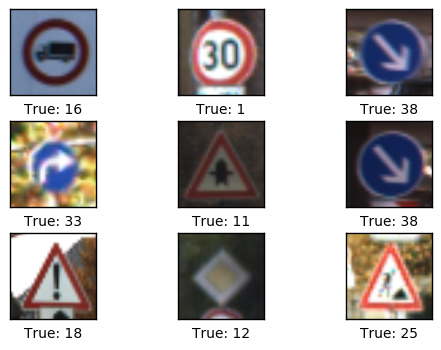

In [37]:
# Get the first 9 images from the test-set.
images = X_test[0:9]

# Get the true classes for those 9 images.
cls_true = y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [38]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def rbg_to_gray(array):

        features = []

        for i in range(0,array.shape[0]):

            image = array[i]

            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            features.append(gray_image)
            
        return np.array(features)


X_train = rbg_to_gray(X_train)

X_test = rbg_to_gray(X_test)

#my_test_X =rbg_to_gray(my_test_X)

print (X_train.shape)


#X_train2=X_train

#X_test2=X_test

#my_test_X2=my_test_X



(39209, 32, 32)


In [39]:
def flatten_image(array):
    
        features = []
        
        for i in range(0,array.shape[0]):
        
            image = array[i]

            f = np.array(image, dtype=np.float32).flatten()

            features.append(f)

        return np.array(features) 
    
X_train = flatten_image(X_train)

X_test = flatten_image(X_test)

#my_test_X =flatten_image(my_test_X)

print(X_train.shape)

(39209, 1024)


In [40]:
def normalize_greyscale(img_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    size_min = 0
    size_max = 255
    norm_img = np.empty_like(img_data, dtype=np.float32)
    norm_img = a + ( ( (img_data - size_min)*(b - a) )/( size_max - size_min ))
    
    return norm_img

In [42]:
train_features = normalize_greyscale(X_train)
test_features = normalize_greyscale(X_test)

#train_features[1]

In [43]:
# One-hot encoding of labels

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
#is_labels_encod = True

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

-The images were left colorscale, but all normalized between 0 and 1 (RGB images are represented by numbers between 0 and 255)

-The labels were on-hot encoded

In [44]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#Split the data using sklean train_test_split

train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.15,
    random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

- I used sklearns train_test_split function.  This was useful because it split the data for me and randmoized it as well

In [45]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
sess = tf.InteractiveSession()

n_input = 1024  # Image data input (img shape: 32*32)
#n_classes = 43  # total classes (43 digits)

x = tf.placeholder(tf.float32, shape=[None, n_input])
#x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape=[None, n_classes])

In [46]:
W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

In [47]:
# Initialize variables
#sess.run(tf.initialize_all_variables())

In [48]:
# Regression model
#y = tf.matmul(x,W) + b

In [49]:
# Calculate cross-entropy
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [50]:
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#batch_size = 1000

#for i in range(1000):
#    batch_start = i * batch_size
#    batch_features = X_train[batch_start:batch_start + batch_size]
#    batch_labels = y_train[batch_start:batch_start + batch_size]  
#    train_step.run(feed_dict={x: batch_features, y_: batch_labels})

In [51]:
# Width of each layer
#layer_width = {'layer_1': 32, 'layer_2': 64, 'layer_3': 128, 'fully_connected': 1024}
layer_width = {'layer_1': 32, 'layer_2': 64, 'fully_connected_1': 1024}

In [52]:
# Weight and bias functions/definitions

def weight(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [53]:
# Weights and biases for each layer of network.  Add to as needed

#weights = {
#    'layer_1': weight([5, 5, 1, layer_width['layer_1']]),
#    'layer_2': weight([5, 5, layer_width['layer_1'], layer_width['layer_2']]),
#    'layer_3': weight([5, 5, layer_width['layer_2'], layer_width['layer_3']]),
#    'fully_connected': weight([8*8*64, layer_width['fully_connected']]),
#    'out': weight([layer_width['fully_connected'], n_classes])
#}

weights = {
    'layer_1': weight([5, 5, 1, layer_width['layer_1']]),
    'layer_2': weight([5, 5, layer_width['layer_1'], layer_width['layer_2']]),
    'fully_connected_1': weight([8*8*64, layer_width['fully_connected_1']]),
    'out': weight([layer_width['fully_connected_1'], n_classes])
}

#biases = {
#    'layer_1': bias([layer_width['layer_1']]),
#    'layer_2': bias([layer_width['layer_2']]),
#    'layer_3': bias([layer_width['layer_3']]),
#    'fully_connected': bias([layer_width['fully_connected']]),
#    'out': bias([n_classes])
#}

biases = {
    'layer_1': bias([layer_width['layer_1']]),
    'layer_2': bias([layer_width['layer_2']]),
    'fully_connected_1': bias([layer_width['fully_connected_1']]),
    'out': bias([n_classes])
}

In [54]:
# Convolutional and max pooling definitions

def conv2d(x, W, b, stride=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [55]:
#W_conv1 = weight([5, 5, 1, layer_width['layer_1']])
#b_conv1 = bias([layer_width['layer_1']])

keep_prob = tf.placeholder(tf.float32)

def conv_net(x, weights, biases, keep_prob):
    # Layer 1 - 32x32 to 16x16
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2 - 16x16 to 8x8
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3 - 7*7*64 to 4*4*128
    #conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    #conv3 = maxpool2d(conv3)

    # Fully connected layer - 4*4*128 to 512
    # Reshape conv3 output to fit fully connected layer input
    #fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    #fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']),biases['fully_connected'])
    #fc1 = tf.nn.tanh(fc1)
    
    fc1 = tf.reshape(conv2, [-1, 8*8*64])
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc1, weights['fully_connected_1']),biases['fully_connected_1']))
    
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # Output Layer - class prediction - 512 to 10
    out = tf.add(tf.matmul(fc1_drop, weights['out']), biases['out'])
    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [56]:
### Train your model here.
### Feel free to use as many code cells as needed.

#tf graph input
#x = tf.placeholder(tf.float32, [None, 32, 32, 3])

# Output
#y = tf.placeholder(tf.float32, [None, n_classes])
x_image = tf.reshape(x, [-1,32,32,1])


logits = conv_net(x_image, weights, biases, keep_prob)


In [57]:
learning_rate = 0.001

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [58]:
# Initializing the variables
init = tf.initialize_all_variables()

In [59]:
import datetime

#x_train_og = X_train
#y_train_og = y_train

batch_size = 20
total_samples = n_train
training_epochs = 20

print("Start time: ", datetime.datetime.now().time())

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(total_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_start = i * batch_size
            batch_x = train_features[batch_start:(batch_start + batch_size)]
            batch_y = train_labels[batch_start:(batch_start + batch_size)]
            
            if i%100 == 0:
                train_acc = accuracy.eval(feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
                #sess.run(accuracy, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
                print("Step %d, Train Accuracy %g, Batch Start %d" %(i, train_acc, batch_start))
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        # Display logs per epoch step
        #c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        #print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
        print("Valid Accuracy %g"%accuracy.eval(feed_dict = {x: valid_features, y: valid_labels, keep_prob: 1.0}))
    print("Optimization Finished!")

# Test model
#correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# Calculate accuracy
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Test Accuracy: %g"%accuracy.eval(feed_dict = {x: test_features, y: test_labels, keep_prob: 1.0}))

print("Finish time: ", datetime.datetime.now().time())

Start time:  21:41:40.516542
Step 0, Train Accuracy 0.1, Batch Start 0
Step 100, Train Accuracy 0.2, Batch Start 2000
Step 200, Train Accuracy 0.25, Batch Start 4000
Step 300, Train Accuracy 0.4, Batch Start 6000
Step 400, Train Accuracy 0.6, Batch Start 8000
Step 500, Train Accuracy 0.8, Batch Start 10000
Step 600, Train Accuracy 0.6, Batch Start 12000
Step 700, Train Accuracy 0.7, Batch Start 14000
Step 800, Train Accuracy 0.85, Batch Start 16000
Step 900, Train Accuracy 0.8, Batch Start 18000
Step 1000, Train Accuracy 0.95, Batch Start 20000
Step 1100, Train Accuracy 0.7, Batch Start 22000
Step 1200, Train Accuracy 0.85, Batch Start 24000
Step 1300, Train Accuracy 1, Batch Start 26000
Step 1400, Train Accuracy 0.95, Batch Start 28000
Step 1500, Train Accuracy 0.9, Batch Start 30000
Step 1600, Train Accuracy 0.8, Batch Start 32000
Step 1700, Train Accuracy nan, Batch Start 34000
Step 1800, Train Accuracy nan, Batch Start 36000
Step 1900, Train Accuracy nan, Batch Start 38000
Valid Ac

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.